# Dimitri Chrysafis

# Introduction

Here I wanted to analyze a bunch of youtube videos because I had wondered which videos get the most views or likes and what they do. I tried getting the dataset myself but failed. Code here (it was a cool side project though): https://github.com/DimitriChrysafis/Youtube-Data/blob/main/youtubeDataCollecter.py. 

## Summary

Analyzing different factors of many youtube videos to see which words are the most common, or what components make a youtube video popular. I graphed these out to make it easy to see and understand. I also graphed the correlation between things like comments and views.

## Consequences

Youtube is everywhere, but there is nearly zero research on it. Beyond the fact that there might increasingly be forms of addicting behavior around things that big tech control, like youtube there is also the concern that youtube tutorials lead to students being vastly overconfident in ways that may be harmful. There has been a little bit of research done on polarization of youtube but I only found one article which did data science on it, so I thought it'd be good if I did it. 

Also misinformation on youtube is another hot topic. In one of my graphs where I track the most common youtube video comments, I find out that the most popular ones are actually written by bots, which supports the fact that youtube is a major source of misinformation at times. 

## References

What is the source of your dataset(s)?

- I got my dataset from Kaggle after trying to make one myself.

List any other references that you found helpful.

- Google dataset search helped me to find a dataset of the right size. A lot of datasets were either too small or too large and google helped me find that was just the right size.

For some reason Deepnote makes me re-install world cloud every time I want to run the entire notebook and I couldn't fix that so just run !pip install wordcloud==1.9.2 before you run this.

In [ ]:
import pandas as pd

df = pd.read_csv("USvideos.csv")

total_likes = df['likes'].sum()

average_likes = df['likes'].mean()

print("Total likes:", total_likes)
print("Average likes:", average_likes)


Total likes: 3041147198
Average likes: 74266.7024347359


Just making sure everything works ^^

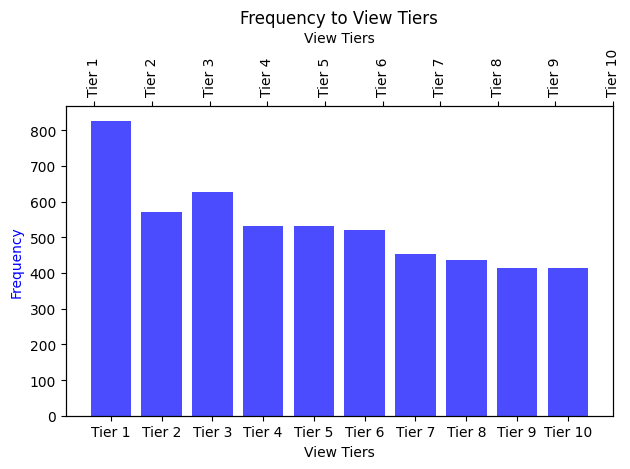

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("USvideos.csv")

# Define the bins and their corresponding labels
# Tier 1: 0-10,000 views
# Tier 2: 10,000-20,000 views
# ...
# Tier 10: 90,000-100,000 views
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

labels = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5', 'Tier 6', 'Tier 7', 'Tier 8', 'Tier 9', 'Tier 10']

df['view_tier'] = pd.cut(df['views'], bins=bins, labels=labels)

view_counts = df['view_tier'].value_counts().sort_index()

# Plot the data
fig, ax1 = plt.subplots()

ax1.bar(view_counts.index, view_counts.values, color='b', alpha=0.7)
ax1.set_xlabel('View Tiers')
ax1.set_ylabel('Frequency', color='b')

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())

bin_midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
ax2.set_xticks(bin_midpoints)
ax2.set_xticklabels(labels, rotation=90)
ax2.set_xlabel('View Tiers')

plt.title('Frequency to View Tiers')
plt.tight_layout()
plt.show()


Had to group the views into tiers because they ranged too much but you can see the more views a video gets (the higher the tier), the fewer the frequency. It's surprisingly linear though which is something I didn't expect. I was expecting it to be more like a graph which goes exponentially down.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

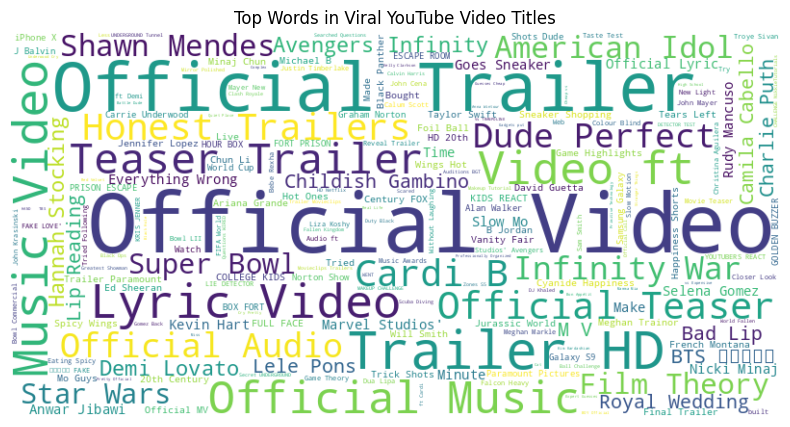

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv("USvideos.csv")

viral_videos = df[df['views'] > 1000000]

titles = viral_videos['title']

all_titles = ' '.join(titles)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in Viral YouTube Video Titles')
plt.show()


Showing which words are the most common in youtube videos. We can see that the most common ones are either movie trailers or music videos. (80% seem to be just that). Most of this is probably due to youtube music and how people can watch a music video way more times than a standard video.

/tmp/ipykernel_99/1707317925.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viral_videos['description'] = viral_videos['description'].astype(str)


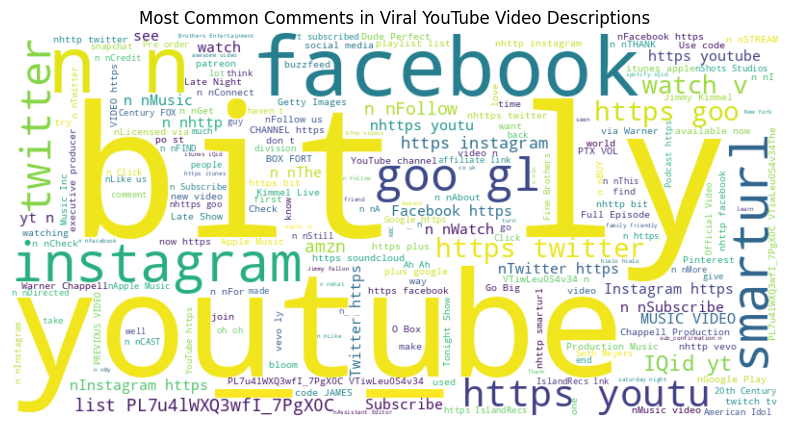

/tmp/ipykernel_99/1707317925.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viral_videos['comment_to_views_ratio'] = viral_videos['comment_count'] / viral_videos['views']


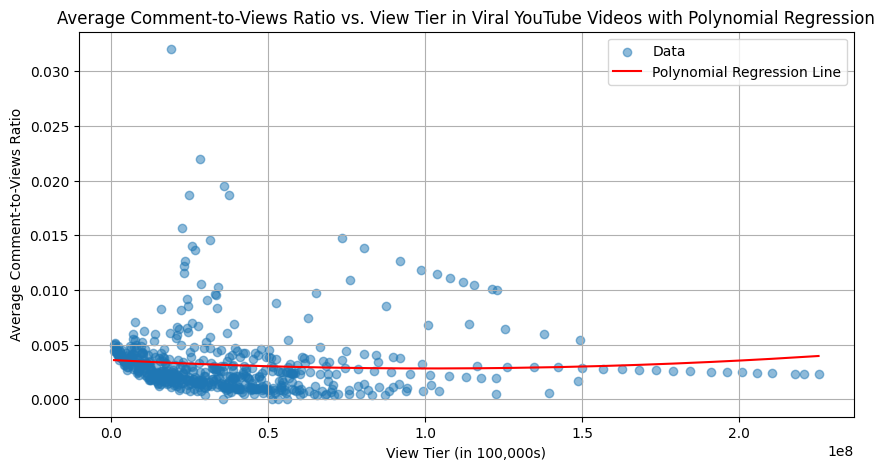

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pd.read_csv("USvideos.csv")

df['view_tier'] = (df['views'] / 100000).round(0) * 100000

# Filter viral videos (e.g., those with views > 1 million)
viral_videos = df[df['views'] > 1000000]

viral_videos['description'] = viral_videos['description'].astype(str)

comments = viral_videos['description']

all_comments = ' '.join(comments)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Comments in Viral YouTube Video Descriptions')
plt.show()

viral_videos['comment_to_views_ratio'] = viral_videos['comment_count'] / viral_videos['views']

view_tier_stats = viral_videos.groupby('view_tier')['comment_to_views_ratio'].mean().reset_index()

X = view_tier_stats['view_tier'].values.reshape(-1, 1)
y = view_tier_stats['comment_to_views_ratio'].values
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict values using the polynomial regression model
y_pred = poly_reg.predict(X_poly)

sort_indices = np.argsort(X, axis=0)
X_sorted = X[sort_indices].reshape(-1, 1)
y_pred_sorted = y_pred[sort_indices].reshape(-1, 1)

plt.figure(figsize=(10, 5))
plt.scatter(view_tier_stats['view_tier'], view_tier_stats['comment_to_views_ratio'], alpha=0.5, label='Data')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial Regression Line')
plt.xlabel('View Tier (in 100,000s)')
plt.ylabel('Average Comment-to-Views Ratio')
plt.title('Average Comment-to-Views Ratio vs. View Tier in Viral YouTube Videos with Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


Its really interesting that on the graph for the most common words in youtube comments, most of the top urls are links attempting to get you away from youtube.com (they are probably bots though.) This adds on to what I mentioned in my intro about there being misinformation in youtube. Youtube comments are easy to bot and that is why it appears to be such an issue. However, youtube and google appear to not be crunching down on this because it boosts their user count

Also in the Average Comment to Views ratio vs View Tier in Viral Youtube Videos with Polynomial Regression we can see that most of them are rather together except for a few outliers which probably means more devoted fans, or bots.

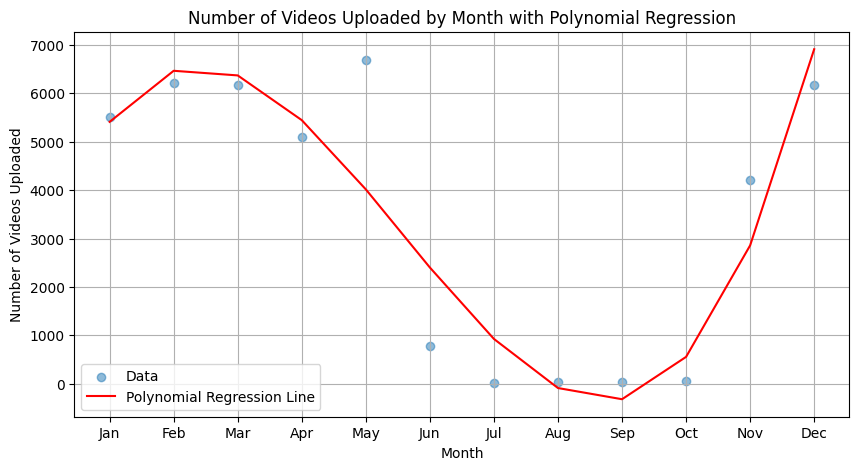

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pd.read_csv("USvideos.csv")

df['publish_time'] = pd.to_datetime(df['publish_time'])

df['publish_month'] = df['publish_time'].dt.month

monthly_video_counts = df['publish_month'].value_counts().sort_index()

months = np.arange(1, 13)

data = pd.DataFrame({'month': months, 'video_count': monthly_video_counts})

X = data['month'].values.reshape(-1, 1)
y = data['video_count'].values
poly = PolynomialFeatures(degree=3)  
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

y_pred = poly_reg.predict(X_poly)

sort_indices = np.argsort(X, axis=0)
X_sorted = X[sort_indices].reshape(-1, 1)
y_pred_sorted = y_pred[sort_indices].reshape(-1, 1)

plt.figure(figsize=(10, 5))
plt.scatter(data['month'], data['video_count'], alpha=0.5, label='Data')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial Regression Line')
plt.xlabel('Month')
plt.ylabel('Number of Videos Uploaded')
plt.title('Number of Videos Uploaded by Month with Polynomial Regression')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


For some reason during the holidays youtube videos appear to be greatly going up, due to the number of people who are at home uploading videos. During August is also the time when school starts for everyone so it makes sense that everyone is trying to reduce the uploads and focus more on school.

In [ ]:
import pandas as pd
import altair as alt

df = pd.read_csv("USvideos.csv")

# Sample a subset of the data (adjust the fraction as needed)
#file was too big to fully load
sampled_df = df.sample(frac=0.1)  # This samples 10% of the data

scatter_plot = alt.Chart(sampled_df).mark_circle().encode(
    x='views:Q',
    y='likes:Q',
    tooltip=['views:Q', 'likes:Q']
).properties(
    width=600,
    height=400,
    title='Relationship Between Likes and Views for YouTube Videos (Sampled Data)'
)

scatter_plot


alt.Chart(...)

Similar to the graph on views to comments, this graph appears to be clustered in the bottom left corner with only a few outliers. I'm not sure why there are videos with hundreds of millions of views which get millions of comments. 

In [ ]:
import pandas as pd
import altair as alt

df = pd.read_csv("USvideos.csv")

df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', utc=True)
df['publish_time'] = pd.to_datetime(df['publish_time'], utc=True)

df['days_since_release'] = (df['trending_date'] - df['publish_time']).dt.days


df = df[df['days_since_release'] <= 365]

average_views = df.groupby('days_since_release')['views'].mean().reset_index()

line_chart = alt.Chart(average_views).mark_line().encode(
    x=alt.X('days_since_release:Q', title='Days Since Release', scale=alt.Scale(domain=(1, 365))),
    y=alt.Y('views:Q', title='Average Views'),
    tooltip=['days_since_release:Q', 'views:Q']
).properties(
    width=800,
    height=400,
    title='Average Views Over Time for YouTube Videos (Up to 365 Days After Release)'
)

line_chart


alt.Chart(...)

In this code above it shows the number of views from the day of release of a youtube video. As we can see, the day that the video is released, the majority of the views are got in within the first few days after the video was posted. I'm not sure why the views take around 20 days to get up to the peak daily views. This came as rather unexpected because I expected the post popular time to be around 24h after the release of the video, so it could target all time zones.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dd57727c-c180-43b8-9edf-8bd41507b4d7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>